# Digital elevation maps in Python using SigmaEpsilon.Mesh and OpenCV

In [1]:
target_width = 280.0
target_height = 90.0
target_elevation = 40.0

height_offset = 250
elevation_offset = 1.0

target_ratio = target_height / target_width

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Open the PNG file
heightmap = Image.open(r'files\heightmap.png')
terrainmap = Image.open(r'files\terrainmap.png')

heightmap = cv2.imread(r'files\heightmap.png')
terrainmap = cv2.imread(r'files\terrainmap.png')

heightmap = cv2.cvtColor(heightmap, cv2.COLOR_RGB2GRAY)
#terrainmap = cv2.cvtColor(terrainmap, cv2.COLOR_RGB2GRAY)

# Convert the image to a numpy array
heightmap_array = np.array(heightmap)
terrainmap_array = np.array(terrainmap)

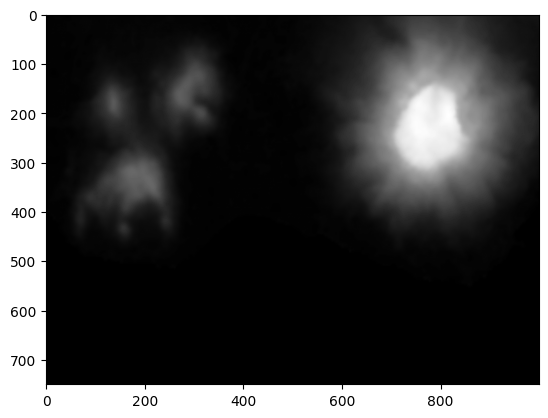

In [3]:
# Display the image using matplotlib
plt.imshow(heightmap_array, cmap='gray')
plt.show()

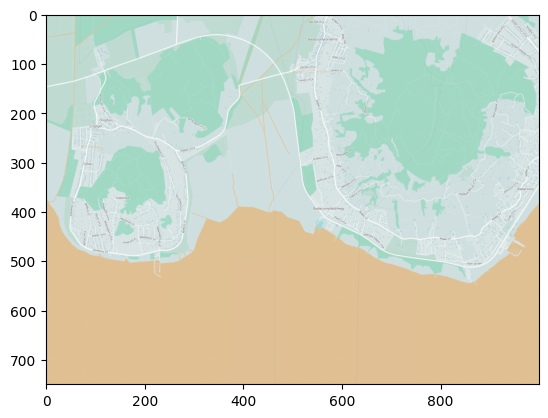

In [4]:
# Display the image using matplotlib
plt.imshow(terrainmap_array)
plt.show()

In [5]:
heightmap_array.shape

(750, 1000)

In [6]:
heightmap_width = heightmap_array.shape[0]
cropped_height = int(target_ratio * heightmap_width)

h0 = height_offset
h1 = height_offset + cropped_height
heightmap_array = heightmap_array[h0:h1, :]
terrainmap_array = terrainmap_array[h0:h1, :]

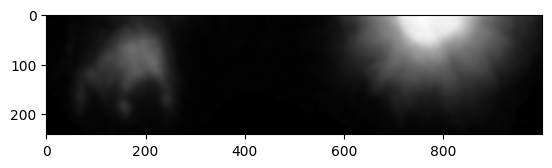

In [7]:
plt.imshow(heightmap_array, cmap='gray')
plt.show()

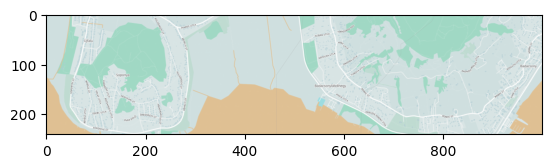

In [8]:
# Display the image using matplotlib
plt.imshow(terrainmap_array)
plt.show()

In [9]:
#heightmap_array = np.flipud(heightmap_array)

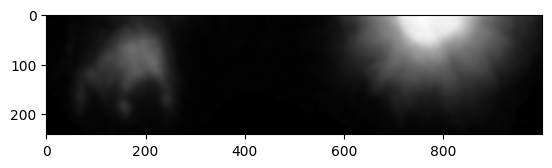

In [10]:
plt.imshow(heightmap_array, cmap='gray')
plt.show()

In [11]:
from polymesh import PolyData, PointData, CartesianFrame
from polymesh.cells import H8
from polymesh.grid import grid

sx, sy = heightmap_array.shape[:2]

coords, topo = grid(
    size=(target_height, target_width, elevation_offset), 
    shape=(sx-1, sy-1, 1), 
    eshape="H8"
)
i_top = np.where(coords[:, 2] > elevation_offset - 1e-12)

scalar = (target_elevation - elevation_offset) / heightmap_array.max()

coords[i_top, 2] = elevation_offset + np.ravel(heightmap_array, order="C") * scalar

frame = CartesianFrame(dim=3)

pd = PointData(coords, frame=frame)
cd = H8(topo, frame=frame)

mesh = PolyData(pd, cd).surface()

mesh.rotate("Space", [0, 0, np.pi/2], "123")

PolyData({})

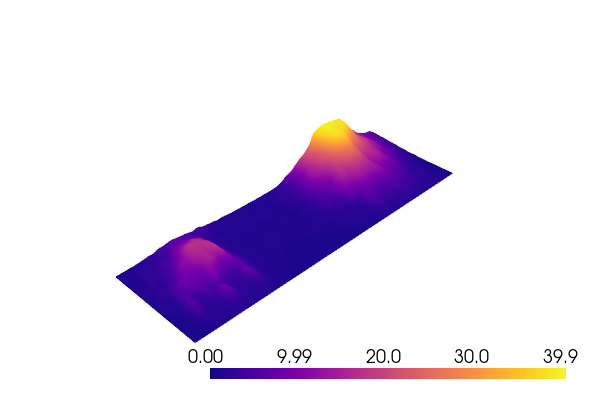

In [27]:
mesh.config["pyvista", "plot", "scalars"] = mesh.centers()[:, 2]
mesh.pvplot(
    notebook=True,
    jupyter_backend="static",
    window_size=(600, 400),
    config_key=["pyvista", "plot"],
    cmap="plasma",
    theme="document",
    show_edges=False
)

In [20]:
#mesh.plot(notebook=False, jupyter_backend="static", show_edges=False)
mesh.pvplot(
    notebook=False,
    jupyter_backend="static",
    window_size=(600, 400),
    config_key=["pyvista", "plot"],
    cmap="plasma",
    theme="document",
    show_edges=False
)

In [13]:
mesh.to_pv()[0].save(r'files\badacsony.vtk')

In [14]:
from polymesh.vtkutils import mesh_to_PolyData
import pyvista as pv

coords = mesh.coords()
topo = mesh.topology()

pvmesh = pv.wrap(mesh_to_PolyData(coords, topo))

In [15]:
pvmesh.save(r'files\badacsony.stl')

In [16]:
coords[:, 0].min(), coords[:, 0].max()

(Array(-280.), Array(5.5109106e-15))

In [17]:
coords[:, 1].min(), coords[:, 1].max()

(Array(0.), Array(90.))

In [18]:
coords[:, -1].min(), coords[:, -1].max()

(Array(0.), Array(40.))